In [1]:
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('DATA.csv')

EDA

In [3]:
df.head()

,Patient_ID,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox
0,P0,None,False,True,True,True,False,True,False,False,Negative
1,P1,Fever,True,False,True,True,False,False,True,False,Positive
2,P2,Fever,False,True,True,False,False,False,True,False,Positive
3,P3,None,True,False,False,False,True,True,True,False,Positive
4,P4,Swollen Lymph Nodes,True,True,True,False,False,True,True,False,Positive


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Patient_ID                      25000 non-null  object
 1   Systemic Illness                25000 non-null  object
 2   Rectal Pain                     25000 non-null  bool  
 3   Sore Throat                     25000 non-null  bool  
 4   Penile Oedema                   25000 non-null  bool  
 5   Oral Lesions                    25000 non-null  bool  
 6   Solitary Lesion                 25000 non-null  bool  
 7   Swollen Tonsils                 25000 non-null  bool  
 8   HIV Infection                   25000 non-null  bool  
 9   Sexually Transmitted Infection  25000 non-null  bool  
 10  MonkeyPox                       25000 non-null  object
dtypes: bool(8), object(3)
memory usage: 781.4+ KB


In [5]:
df.isnull().sum()

Patient_ID                        0
Systemic Illness                  0
Rectal Pain                       0
Sore Throat                       0
Penile Oedema                     0
Oral Lesions                      0
Solitary Lesion                   0
Swollen Tonsils                   0
HIV Infection                     0
Sexually Transmitted Infection    0
MonkeyPox                         0
dtype: int64

In [6]:
df.describe()

,Patient_ID,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox
count,25000,25000,25000,25000,25000,25000,25000,25000,25000,25000,25000
unique,25000,4,2,2,2,2,2,2,2,2,2
top,P0,Fever,False,True,True,False,True,True,True,False,Positive
freq,1,6382,12655,12554,12612,12514,12527,12533,12584,12554,15909


In [7]:
df.corr()

,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection
Rectal Pain,1.000000,0.006214,0.005312,0.007747,0.001147,0.002113,0.005764,0.000666
Sore Throat,0.006214,1.000000,0.009082,-0.000795,-0.003609,-0.002011,0.000771,-0.001901
Penile Oedema,0.005312,0.009082,1.000000,0.003850,0.002781,0.000536,0.003620,-0.005722
Oral Lesions,0.007747,-0.000795,0.003850,1.000000,-0.005198,-0.007757,-0.012153,-0.002725
Solitary Lesion,0.001147,-0.003609,0.002781,-0.005198,1.000000,0.002874,-0.002335,0.009849
Swollen Tonsils,0.002113,-0.002011,0.000536,-0.007757,0.002874,1.000000,-0.004258,-0.006469
HIV Infection,0.005764,0.000771,0.003620,-0.012153,-0.002335,-0.004258,1.000000,0.001309
Sexually Transmitted Infection,0.000666,-0.001901,-0.005722,-0.002725,0.009849,-0.006469,0.001309,1.000000


In [8]:
df.head()

,Patient_ID,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox
0,P0,None,False,True,True,True,False,True,False,False,Negative
1,P1,Fever,True,False,True,True,False,False,True,False,Positive
2,P2,Fever,False,True,True,False,False,False,True,False,Positive
3,P3,None,True,False,False,False,True,True,True,False,Positive
4,P4,Swollen Lymph Nodes,True,True,True,False,False,True,True,False,Positive


Data Visualization

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [10]:
listitem = []

for col in df.columns:
    listitem.append({
        'column' : col,
        'data type' : df[col].dtype,
        'null total' : df[col].isna().sum(),
        'null pctg' : round(df[col].isna().sum()/len(df[col])*100,2),
        'n_unique' : df[col].nunique(),
        'sample' : df[col].drop_duplicates().sample(2).values   
    })
    
pd.DataFrame(listitem)

,column,data type,null total,null pctg,n_unique,sample
0,Patient_ID,object,0,0.0,25000,"[P22221, P4360]"
1,Systemic Illness,object,0,0.0,4,"[Swollen Lymph Nodes, None]"
2,Rectal Pain,bool,0,0.0,2,"[False, True]"
3,Sore Throat,bool,0,0.0,2,"[True, False]"
4,Penile Oedema,bool,0,0.0,2,"[True, False]"
5,Oral Lesions,bool,0,0.0,2,"[False, True]"
6,Solitary Lesion,bool,0,0.0,2,"[True, False]"
7,Swollen Tonsils,bool,0,0.0,2,"[True, False]"
8,HIV Infection,bool,0,0.0,2,"[False, True]"
9,Sexually Transmitted Infection,bool,0,0.0,2,"[False, True]"


In [11]:
df['MonkeyPox'].value_counts()

Positive    15909
Negative     9091
Name: MonkeyPox, dtype: int64

In [12]:
positive = df[df['MonkeyPox']=='Positive']
positive.head()

,Patient_ID,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox
1,P1,Fever,True,False,True,True,False,False,True,False,Positive
2,P2,Fever,False,True,True,False,False,False,True,False,Positive
3,P3,None,True,False,False,False,True,True,True,False,Positive
4,P4,Swollen Lymph Nodes,True,True,True,False,False,True,True,False,Positive
6,P6,Fever,False,True,False,False,False,False,True,False,Positive


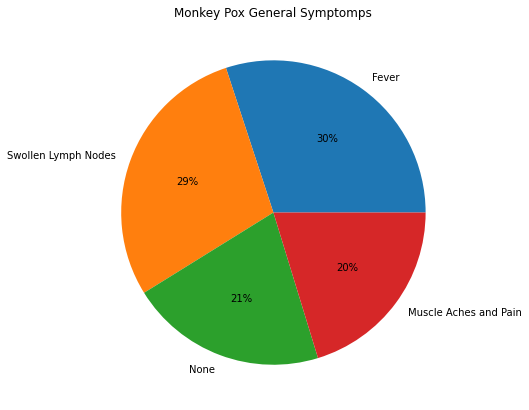

In [13]:
fig = plt.figure(figsize=(14, 7))
plt.pie(x=positive['Systemic Illness'].value_counts(),labels = positive['Systemic Illness'].value_counts().index,autopct='%.0f%%')
plt.title('Monkey Pox General Symptomps')
plt.show()

In [14]:
positive['Systemic Illness'].value_counts()

Fever                    4780
Swollen Lymph Nodes      4581
None                     3324
Muscle Aches and Pain    3224
Name: Systemic Illness, dtype: int64

In [15]:
positive = positive.replace([True,False],[1,0])
positive.head()

,Patient_ID,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox
1,P1,Fever,1,0,1,1,0,0,1,0,Positive
2,P2,Fever,0,1,1,0,0,0,1,0,Positive
3,P3,None,1,0,0,0,1,1,1,0,Positive
4,P4,Swollen Lymph Nodes,1,1,1,0,0,1,1,0,Positive
6,P6,Fever,0,1,0,0,0,0,1,0,Positive


In [16]:
import plotly.express as px

for i,col in enumerate(positive.columns[2:-1]):
    fig = px.histogram(positive,x=col,color=col)
    fig.update_xaxes(tickvals=[0,1])
    fig.update_yaxes(range=[0,10000])
    fig.show()

In [17]:
new = []

for i,col in enumerate(positive.columns[2:-1]):
    new.append(round(positive[col].sum()/len(positive)*100,2))
    
symptomp = pd.DataFrame(new, index = [positive.columns[2:-1]],columns = ['Total'])
symptomp = symptomp.reset_index()
symptomp.columns = ['name','total']

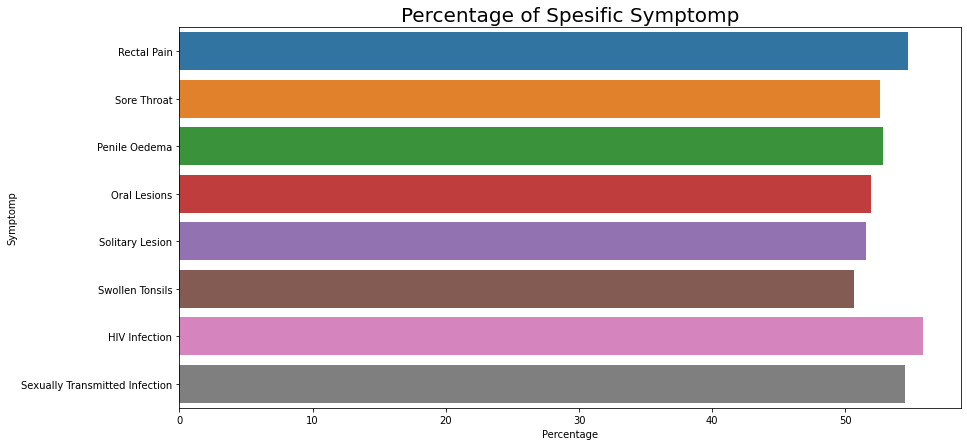

In [18]:
plt.figure(figsize=(14,7))
sns.barplot(x='total',y='name',data=symptomp)
plt.xlabel('Percentage')
plt.ylabel('Symptomp')
plt.title('Percentage of Spesific Symptomp',size=20)
plt.show()

In [19]:
df['Systemic Illness'].replace({'None':0,'Fever':1, 'Swollen Lymph Nodes':2, 'Muscle Aches and Pain':3},inplace = True)
df['Rectal Pain'].replace({False:0, True:1},inplace = True)
df['Sore Throat'].replace({False:0, True:1},inplace = True)
df['Penile Oedema'].replace({False:0, True:1},inplace = True)
df['Oral Lesions'].replace({False:0, True:1},inplace = True)
df['Solitary Lesion'].replace({False:0, True:1},inplace = True)
df['Swollen Tonsils'].replace({False:0, True:1},inplace = True)
df['HIV Infection'].replace({False:0, True:1},inplace = True)
df['Sexually Transmitted Infection'].replace({False:0, True:1},inplace = True)
df['MonkeyPox'].replace({'Negative':0,'Positive':1},inplace = True)

1    15909
0     9091
Name: MonkeyPox, dtype: int64


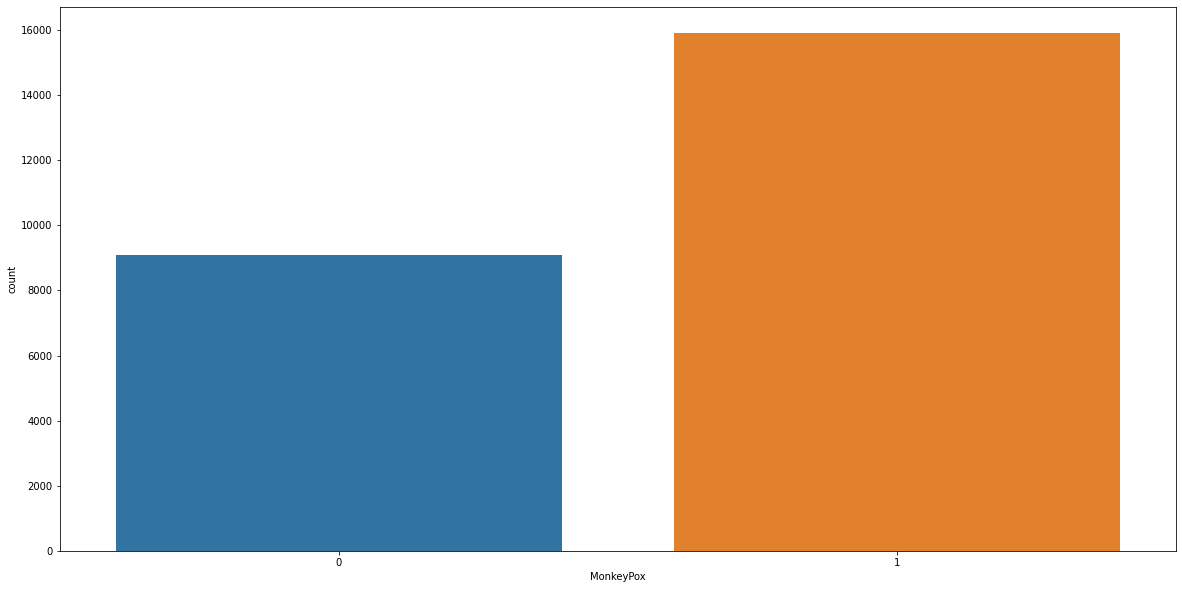

In [20]:
plt.figure(figsize=(20,10))
sns.countplot(x=df["MonkeyPox"])
print(df["MonkeyPox"].value_counts())

In [21]:
numeric_columns = [column for column in df.columns if df[column].dtype == 'int64']
print(numeric_columns)

['Systemic Illness', 'Rectal Pain', 'Sore Throat', 'Penile Oedema', 'Oral Lesions', 'Solitary Lesion', 'Swollen Tonsils', 'HIV Infection', 'Sexually Transmitted Infection', 'MonkeyPox']


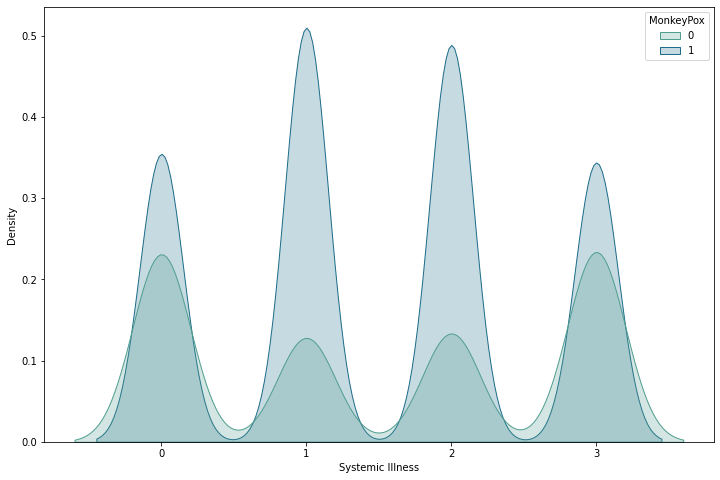

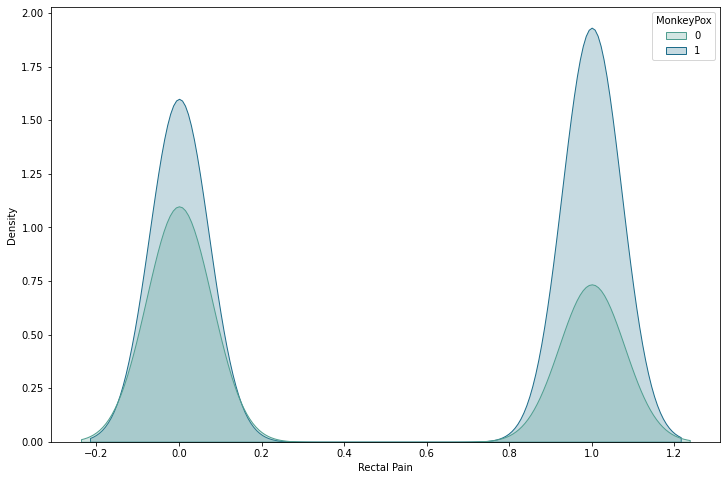

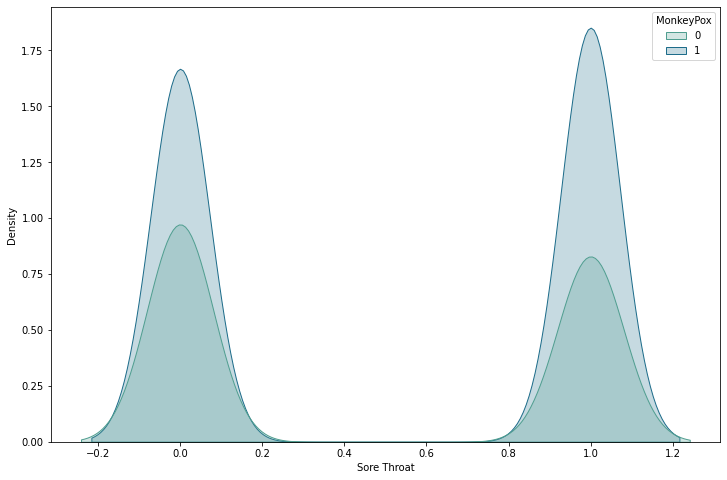

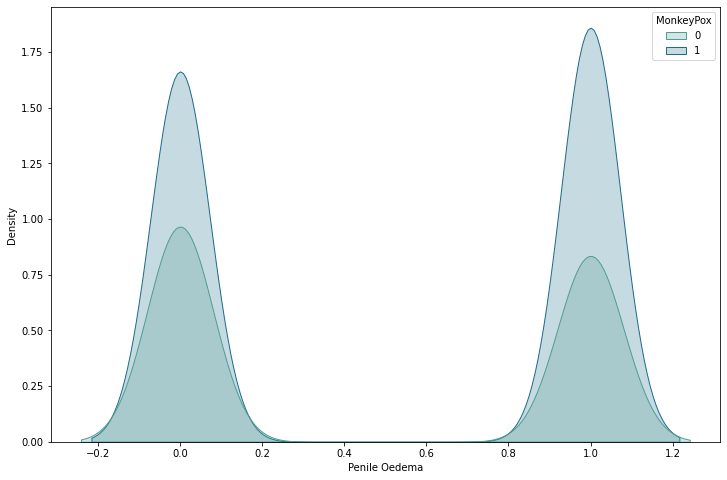

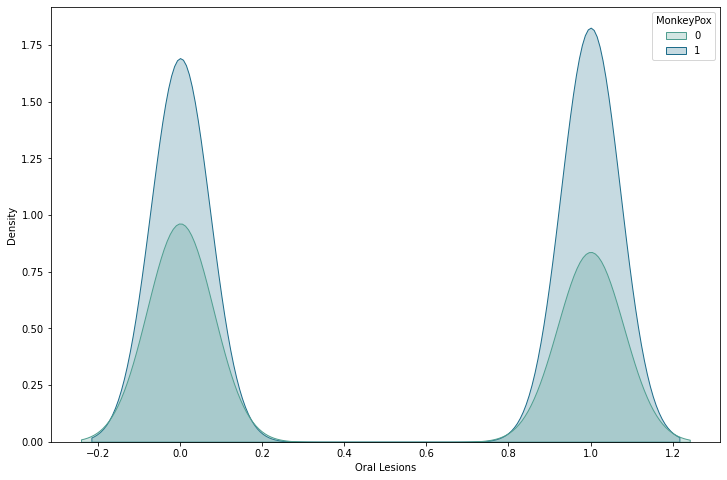

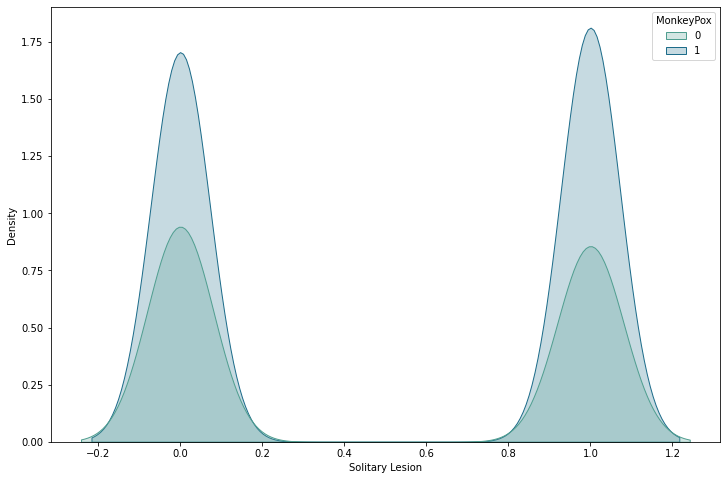

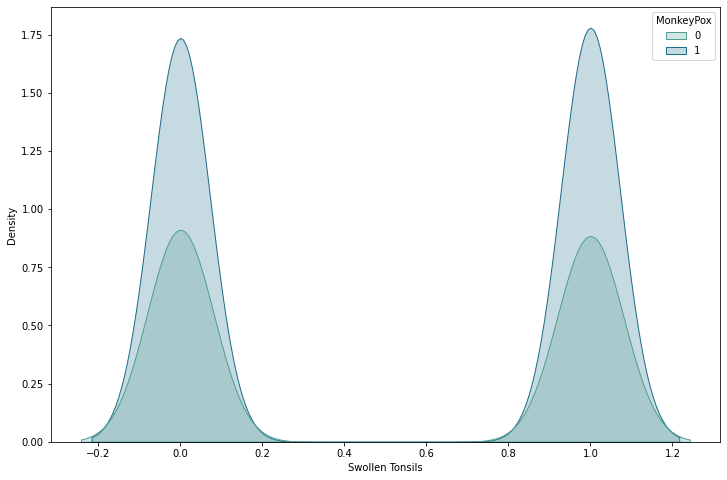

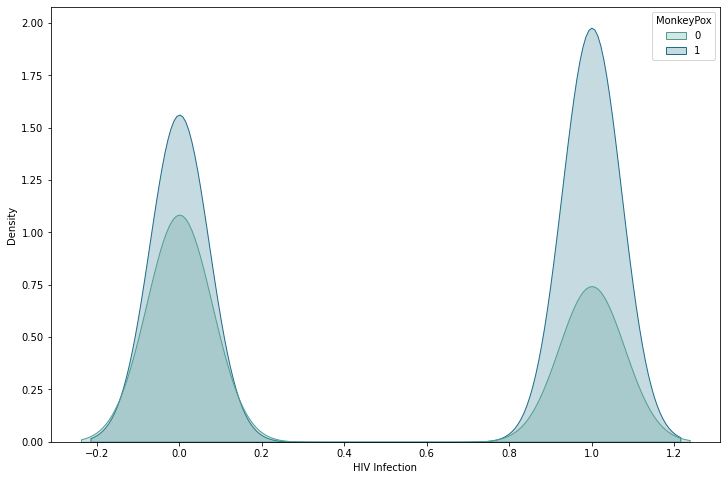

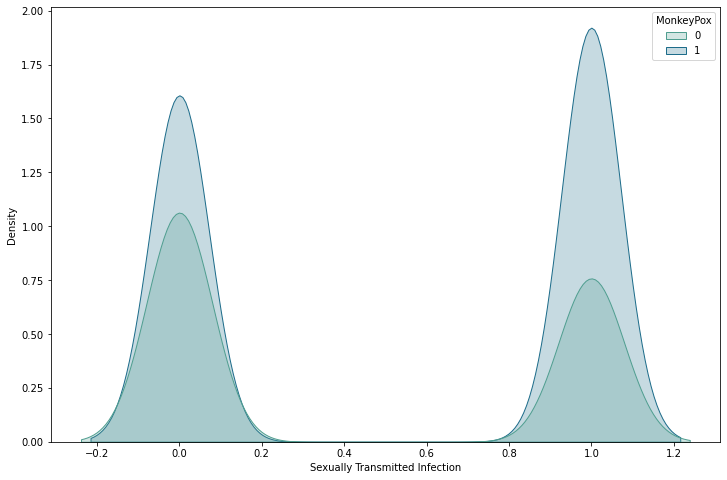

In [22]:
for column in numeric_columns:
    if column != 'MonkeyPox':
        plt.figure(figsize=(12,8))
        sns.kdeplot(data=df, x=column, hue='MonkeyPox', palette="crest", fill=True)
        plt.show()

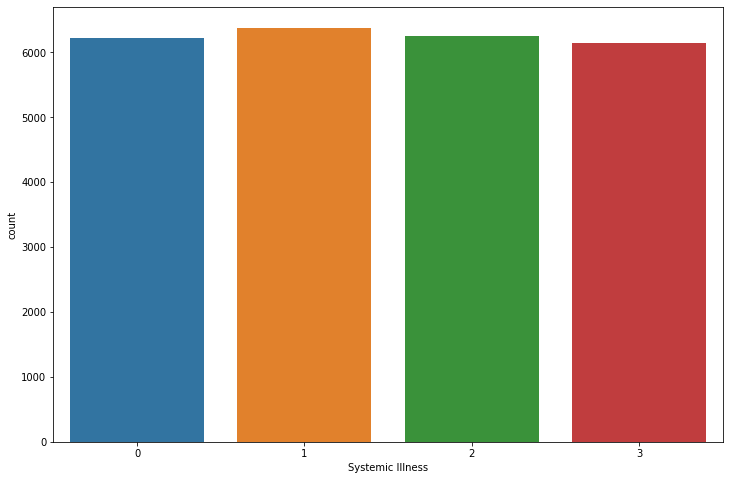

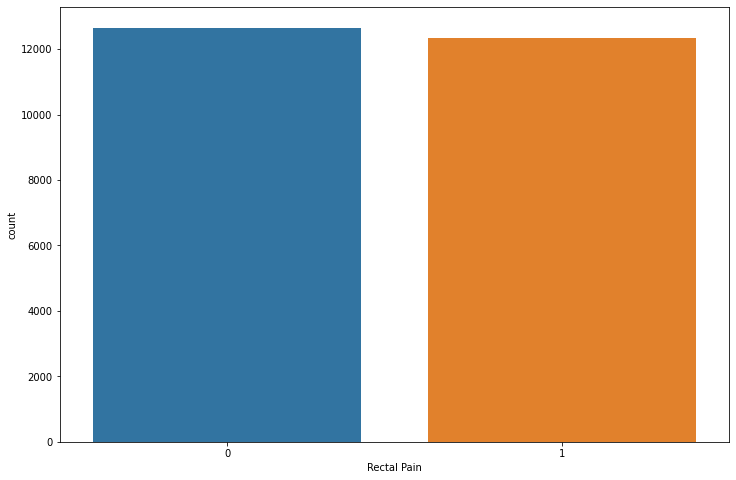

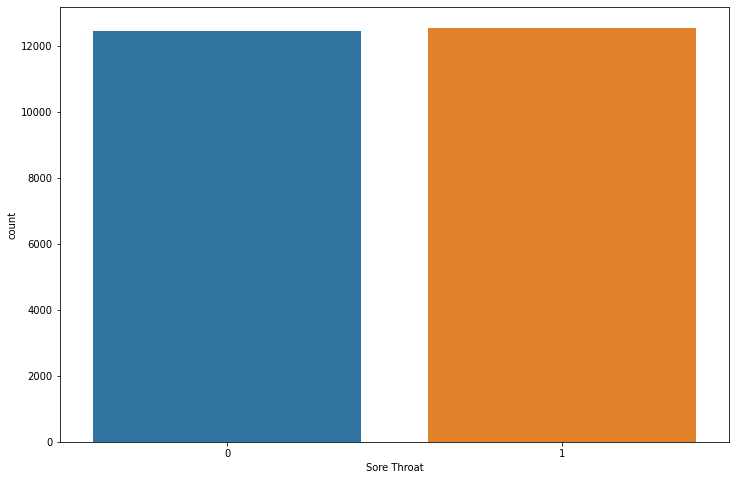

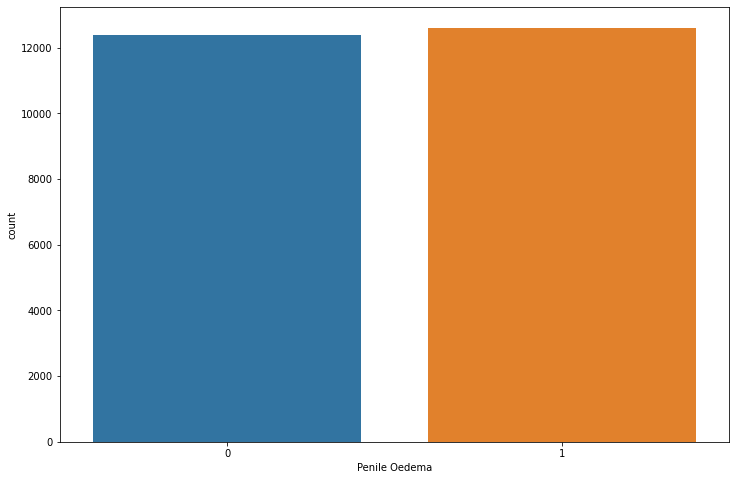

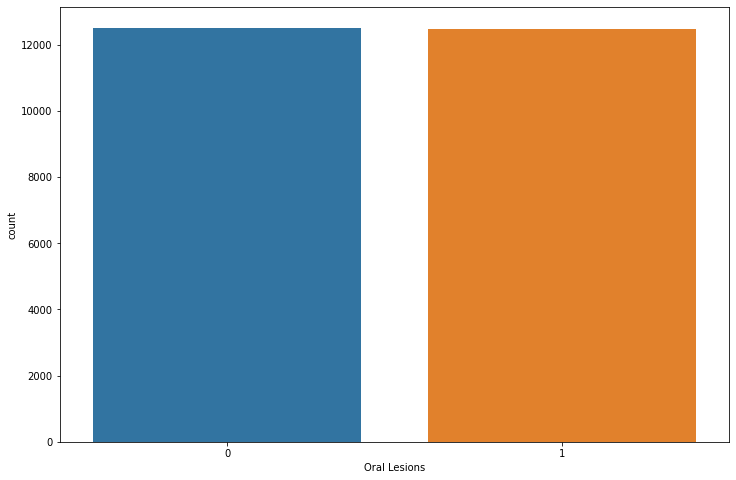

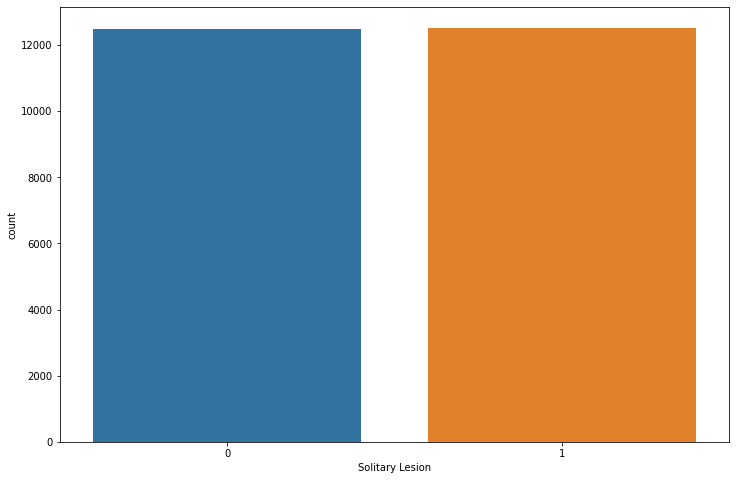

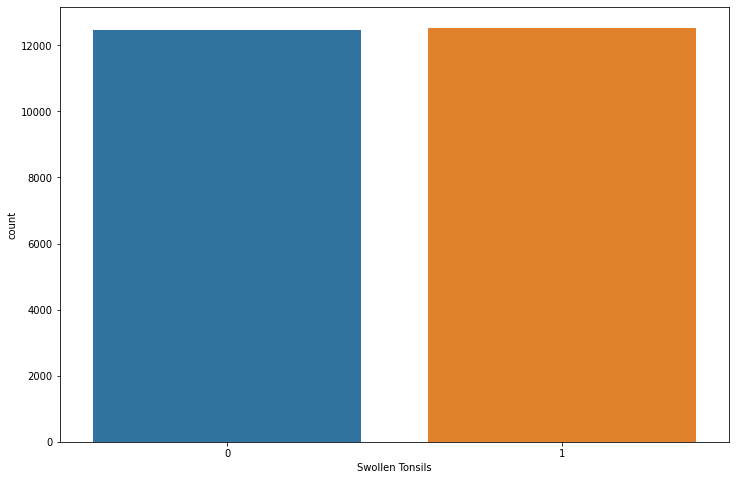

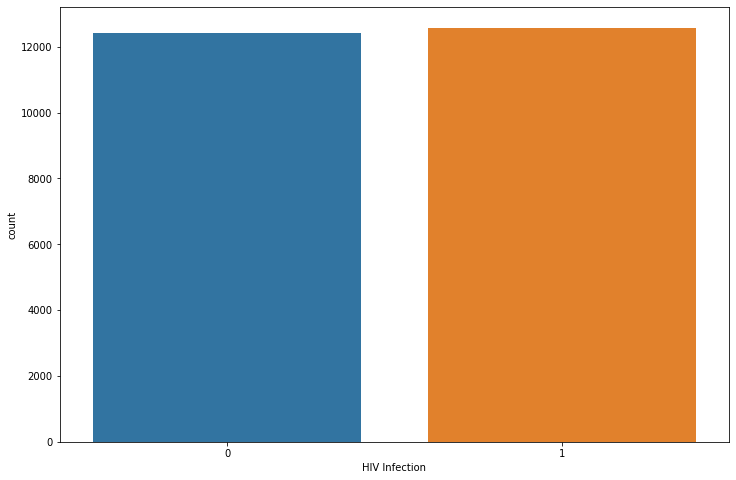

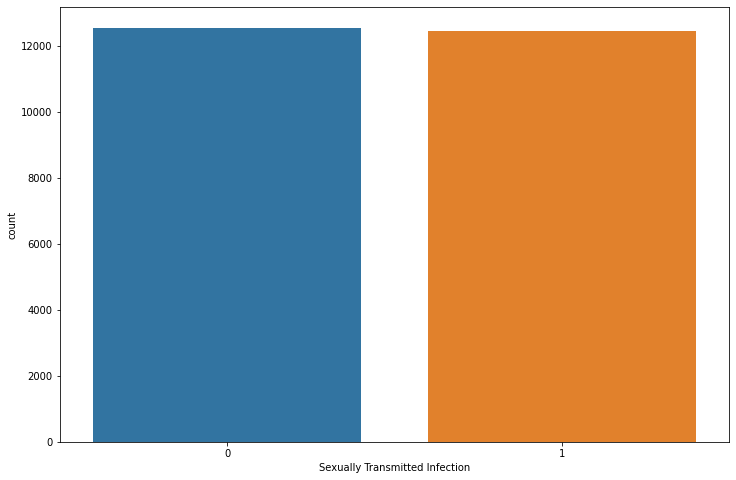

In [23]:
for column in numeric_columns:
    if column != 'MonkeyPox':
        plt.figure(figsize=(12,8))
        sns.countplot(x=df[column])
        plt.show()

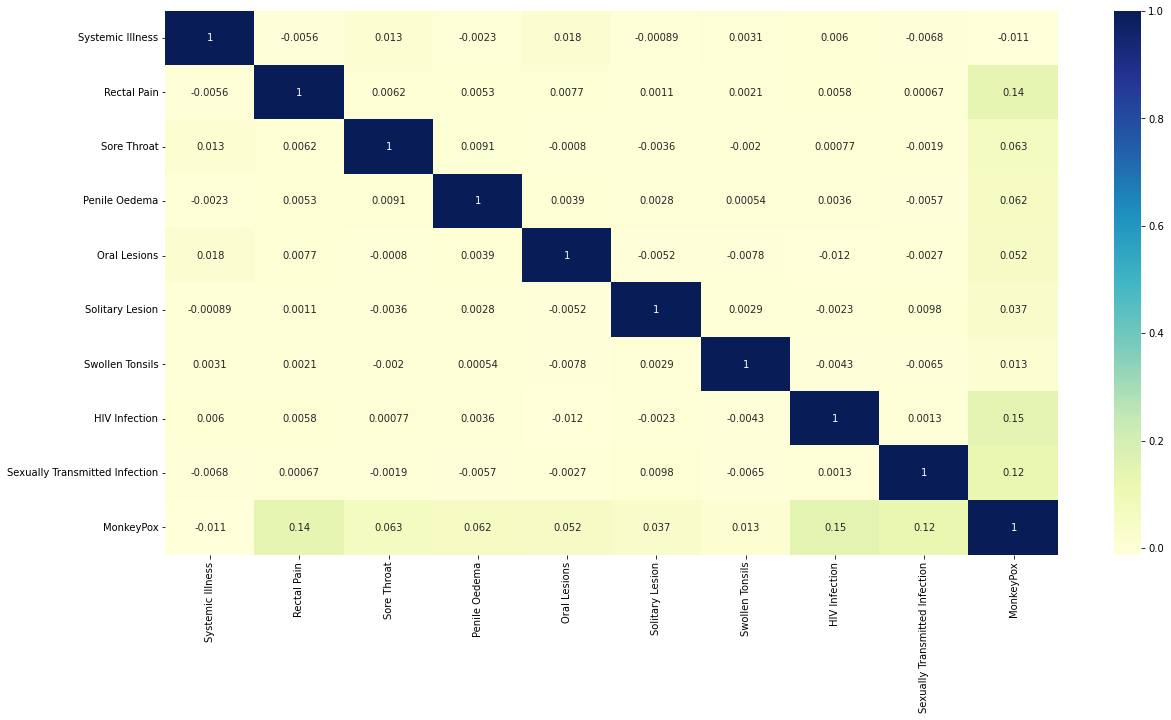

In [24]:
plt.figure(figsize=(20,10))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap="YlGnBu")

Classification

In [25]:
abs(df.corr()['MonkeyPox']).sort_values(ascending = False)

MonkeyPox                         1.000000
HIV Infection                     0.146192
Rectal Pain                       0.140727
Sexually Transmitted Infection    0.123376
Sore Throat                       0.063385
Penile Oedema                     0.061905
Oral Lesions                      0.051955
Solitary Lesion                   0.037471
Swollen Tonsils                   0.013221
Systemic Illness                  0.010841
Name: MonkeyPox, dtype: float64

In [26]:
X = df.loc[:, ["Systemic Illness", "Rectal Pain", "Sore Throat", "Penile Oedema", "Oral Lesions", "Solitary Lesion", "Swollen Tonsils", "HIV Infection", "Sexually Transmitted Infection"]]
y = df.loc[:, "MonkeyPox"]

In [27]:
X.head()

,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection
0,0,0,1,1,1,0,1,0,0
1,1,1,0,1,1,0,0,1,0
2,1,0,1,1,0,0,0,1,0
3,0,1,0,0,0,1,1,1,0
4,2,1,1,1,0,0,1,1,0


In [28]:
y.head()

0    0
1    1
2    1
3    1
4    1
Name: MonkeyPox, dtype: int64

In [29]:
X.shape,y.shape

((25000, 9), (25000,))

In [30]:
le = LabelEncoder()
for i in X.columns:
  X[i] = le.fit_transform(X[i])
y = le.fit_transform(y)

In [31]:
print(X)

       Systemic Illness  Rectal Pain  Sore Throat  Penile Oedema  \
0                     0            0            1              1   
1                     1            1            0              1   
2                     1            0            1              1   
3                     0            1            0              0   
4                     2            1            1              1   
...                 ...          ...          ...            ...   
24995                 0            1            1              0   
24996                 1            0            1              1   
24997                 0            1            1              0   
24998                 2            0            1              0   
24999                 2            0            0              1   

       Oral Lesions  Solitary Lesion  Swollen Tonsils  HIV Infection  \
0                 1                0                1              0   
1                 1                0   

In [32]:
print(y)

[0 1 1 ... 1 0 1]


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [34]:
lr = LogisticRegression()
rc = RidgeClassifier()
dtc = DecisionTreeClassifier()
gnb = GaussianNB()
mlp = MLPClassifier()

In [35]:
lr.fit(X_train, y_train)
rc.fit(X_train, y_train)
dtc.fit(X_train, y_train)
gnb.fit(X_train, y_train)
mlp.fit(X_train, y_train)

MLPClassifier()

In [36]:
lr_pred = lr.predict(X_test)
rc_pred = rc.predict(X_test)
dtc_pred = dtc.predict(X_test)
gnb_pred = gnb.predict(X_test)
mlp_pred = mlp.predict(X_test)

In [37]:
lr_report = classification_report(y_test, lr_pred)
rc_report = classification_report(y_test, rc_pred)
dtc_report = classification_report(y_test, dtc_pred)
gnb_report = classification_report(y_test, gnb_pred)
mlp_report = classification_report(y_test, mlp_pred)

In [38]:
print("*****LOGISTIC REGRESSION*****")
print(lr_report)

print("*****RIDGE REGRESSION*****")
print(rc_report)

print("*****DESICION TREE *****")
print(dtc_report)

print("*****NAIVE BAYES *****")
print(gnb_report)

print("*****NEURAL NETWORK*****")
print(mlp_report)

*****LOGISTIC REGRESSION*****
              precision    recall  f1-score   support

           0       0.56      0.27      0.36      2664
           1       0.69      0.88      0.77      4836

    accuracy                           0.67      7500
   macro avg       0.62      0.58      0.57      7500
weighted avg       0.64      0.67      0.63      7500

*****RIDGE REGRESSION*****
              precision    recall  f1-score   support

           0       0.56      0.25      0.34      2664
           1       0.68      0.89      0.77      4836

    accuracy                           0.66      7500
   macro avg       0.62      0.57      0.56      7500
weighted avg       0.64      0.66      0.62      7500

*****DESICION TREE *****
              precision    recall  f1-score   support

           0       0.55      0.38      0.45      2664
           1       0.71      0.83      0.76      4836

    accuracy                           0.67      7500
   macro avg       0.63      0.61      0.61   

In [39]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

In [40]:
rfc_report = classification_report(y_test, rfc_pred)
print(rfc_report)

              precision    recall  f1-score   support

           0       0.56      0.36      0.44      2664
           1       0.71      0.84      0.77      4836

    accuracy                           0.67      7500
   macro avg       0.63      0.60      0.60      7500
weighted avg       0.65      0.67      0.65      7500



In [41]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [42]:
pip install Jinja2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [43]:
pip install pycaret --user

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [44]:
pip install markupsafe==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [45]:
import jinja2

In [46]:
from pycaret.classification import *

In [47]:
dff = df.loc[:, ["MonkeyPox", "Systemic Illness", "Rectal Pain", "Sore Throat", "Penile Oedema", "Oral Lesions", "Solitary Lesion", "Swollen Tonsils", "HIV Infection", "Sexually Transmitted Infection"]]
dff

,MonkeyPox,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection
0,0,0,0,1,1,1,0,1,0,0
1,1,1,1,0,1,1,0,0,1,0
2,1,1,0,1,1,0,0,0,1,0
3,1,0,1,0,0,0,1,1,1,0
4,1,2,1,1,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...
24995,1,0,1,1,0,1,1,0,0,1
24996,1,1,0,1,1,0,1,1,1,1
24997,1,0,1,1,0,0,1,1,0,0
24998,0,2,0,1,0,1,1,1,0,0


In [48]:
le = LabelEncoder()

for i in dff.columns:
  dff[i] = le.fit_transform(dff[i])

dff.head()

,MonkeyPox,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection
0,0,0,0,1,1,1,0,1,0,0
1,1,1,1,0,1,1,0,0,1,0
2,1,1,0,1,1,0,0,0,1,0
3,1,0,1,0,0,0,1,1,1,0
4,1,2,1,1,1,0,0,1,1,0


In [49]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   MonkeyPox                       25000 non-null  int64
 1   Systemic Illness                25000 non-null  int64
 2   Rectal Pain                     25000 non-null  int64
 3   Sore Throat                     25000 non-null  int64
 4   Penile Oedema                   25000 non-null  int64
 5   Oral Lesions                    25000 non-null  int64
 6   Solitary Lesion                 25000 non-null  int64
 7   Swollen Tonsils                 25000 non-null  int64
 8   HIV Infection                   25000 non-null  int64
 9   Sexually Transmitted Infection  25000 non-null  int64
dtypes: int64(10)
memory usage: 1.9 MB


In [50]:
clf=setup(data=dff, target="MonkeyPox", session_id=1229, normalize=True)

,Description,Value
0,session_id,1229
1,Target,MonkeyPox
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(25000, 10)"
5,Missing Values,False
6,Numeric Features,0
7,Categorical Features,9
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='MonkeyPox',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_st...
                ('P_transform', 'passthrough'), ('binn', 'passthrough'),
                ('rem_outliers', 'passthrough'), ('cluster_all', 'passthrough'),
                ('du

In [51]:
compare_models(sort="AUC")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.6891,0.7002,0.8607,0.7107,0.7785,0.2725,0.2870,0.650
ada,Ada Boost Classifier,0.6890,0.7002,0.8601,0.7108,0.7784,0.2727,0.2870,0.456
lda,Linear Discriminant Analysis,0.6885,0.7002,0.8577,0.7112,0.7776,0.2727,0.2863,0.049
gbc,Gradient Boosting Classifier,0.6912,0.6966,0.8768,0.7072,0.7829,0.2690,0.2884,0.823
nb,Naive Bayes,0.6568,0.6914,0.7220,0.7334,0.7276,0.2640,0.2641,0.095
lightgbm,Light Gradient Boosting Machine,0.6842,0.6895,0.8842,0.6985,0.7805,0.2444,0.2671,0.259
dt,Decision Tree Classifier,0.6597,0.6621,0.8159,0.6987,0.7527,0.2174,0.2243,0.118
et,Extra Trees Classifier,0.6597,0.6621,0.8159,0.6987,0.7527,0.2174,0.2243,1.011
rf,Random Forest Classifier,0.6660,0.6618,0.8394,0.6968,0.7614,0.2206,0.2315,1.300
knn,K Neighbors Classifier,0.6503,0.6324,0.7799,0.7023,0.7390,0.2134,0.2163,0.975


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1229, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1229, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)